## Observations and Insights 

1) Ramicane is the best performing drug remigen, and the most consistant with the smallest spread and deviation (with Capomulin close behind)

2) Ketapril was the least consistent performing drug with the greatest variance.

3) There is a strong, positive correlation between weight and tumor volume size.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
import random #used to randomly select a mouse from Capomulin treatment
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
merge_df=pd.merge(mouse_metadata,study_results,how="outer")
# Display the data table for preview
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [2]:
# Checking the number of mice.
num_mice=len(merge_df["Mouse ID"].unique())
print(f"{num_mice} mice") #output number of mice

249 mice


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_list=merge_df.loc[(merge_df.duplicated(["Mouse ID","Timepoint"])==True)] #finds mice ids with duplicate timepoints
print(dup_list["Mouse ID"].unique()) #outputs the mouse id that has duplicate Timepoints

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_df.loc[(merge_df["Mouse ID"]) == "g989"] #outputs all data for the mouse id with duplicate timepoints

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.loc[(merge_df["Mouse ID"]) !="g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean=len(clean_df["Mouse ID"].unique())
print(f"{num_mice_clean} mice") #output number of mice

248 mice


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#groups the data frame by Drug Regimen
drug_gb=clean_df.groupby("Drug Regimen")

#creates a dataframe with drug regimen as index and the first column as mean tumor volume
summ_stat_df=pd.DataFrame(drug_gb.mean()["Tumor Volume (mm3)"])
summ_stat_df=summ_stat_df.rename(columns={"Tumor Volume (mm3)":"Mean Tumor Volume"})#renames first column

#summarizes other columns
summ_stat_df["Mean Tumor Volume"]=round(summ_stat_df["Mean Tumor Volume"])
summ_stat_df["Median Tumor Volume"]=round(drug_gb.median()["Tumor Volume (mm3)"],2) #adds column for median tumor volume
summ_stat_df["Variance Tumor Volume"]=round(drug_gb.var()["Tumor Volume (mm3)"],2) #adds column for tumor volume variance
summ_stat_df["Standard Deviation Tumor Volume"]=round(drug_gb.std()["Tumor Volume (mm3)"],2) #adds column for tumor volume variance
summ_stat_df["SEM Tumor Volume"]=round(drug_gb.sem()["Tumor Volume (mm3)"],2) #adds column for standard error

#outputs data frame
summ_stat_df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,41.0,41.56,24.95,4.99,0.33
Ceftamin,53.0,51.78,39.29,6.27,0.47
Infubinol,53.0,51.82,43.13,6.57,0.49
Ketapril,55.0,53.70,68.55,8.28,0.60
Naftisol,54.0,52.51,66.17,8.13,0.60
Placebo,54.0,52.29,61.17,7.82,0.58
Propriva,52.0,50.45,43.85,6.62,0.54
Ramicane,40.0,40.67,23.49,4.85,0.32
Stelasyn,54.0,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

drug_gb["Tumor Volume (mm3)"].agg(Mean_Tumor_Volume='mean',Median_Tumor_Volume='median',Variance_Tumor_Volume='var',Standard_Deviation_Tumor_Volume='std',SEM_Tumor_Volume='sem').round(2)

,Mean_Tumor_Volume,Median_Tumor_Volume,Variance_Tumor_Volume,Standard_Deviation_Tumor_Volume,SEM_Tumor_Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

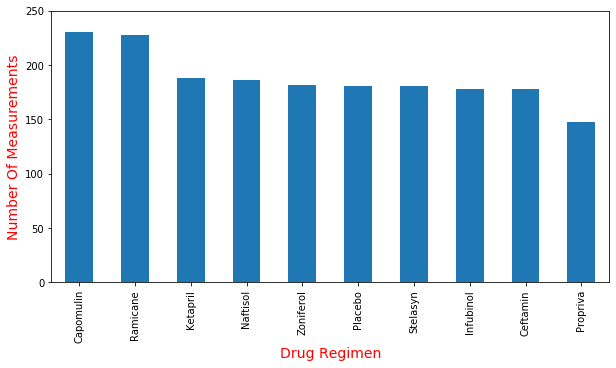

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_measure_num=clean_df["Drug Regimen"].value_counts() #calculates the number of measurements for each drug

drug_measure_num_graph=drug_measure_num.plot(kind="bar",figsize=(10,5)) #creates a bar graph with Drug Regimen and Number Of Measurements

#formats and labels graph
plt.ylim(0,drug_measure_num.max()+20) #formats the y limit
drug_measure_num_graph.set_xlabel("Drug Regimen",fontsize=14,color="red") 
drug_measure_num_graph.set_ylabel("Number Of Measurements",fontsize=14,color="red")

#outputs results
plt.show()
plt.tight_layout()

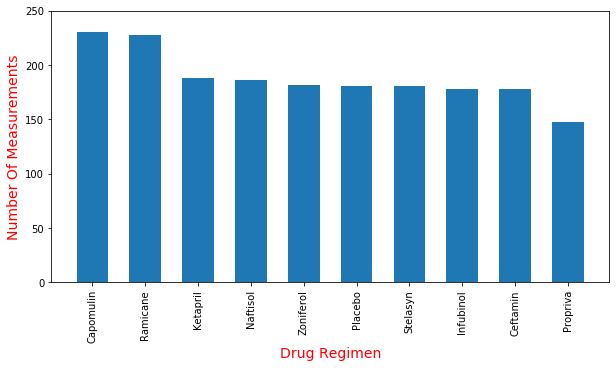

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis=np.arange(0,len(drug_measure_num),1) #sets the values for x axis
y_axis=drug_measure_num #assigns the values for the y_axis

plt.figure(figsize=(10,5))#sets the figure size

#sets the x ticks and names
x_name=drug_measure_num.index #finds the names to assign for x
x_ticks_location=[value for value in x_axis]  #finds the names to assign for x
plt.xticks(x_ticks_location,x_name,rotation=90)

#adds the x and y label
plt.xlabel("Drug Regimen",fontsize=14,color="red")
plt.ylabel("Number Of Measurements",fontsize=14,color="red")

#plots the graph
plt.bar(x_axis,y_axis,width=0.6)

#changes the y limit
plt.ylim(0,drug_measure_num.max()+20) #formats the y limit

#outputs the results
plt.show()
plt.tight_layout()

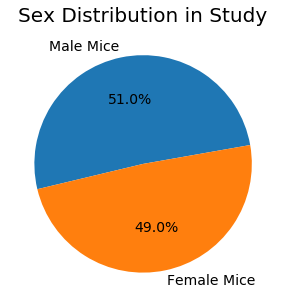

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_count=clean_df["Sex"].value_counts() #finds the value counts for sexes

#plots the distribution of sexes in pie graph
sex_graph=sex_count.plot(kind="pie",labels=["Male Mice","Female Mice"],figsize=(10,5),autopct="%1.1f%%",startangle=10,fontsize=14)

#adds a title for the graph
plt.title("Sex Distribution in Study",fontsize=20)
sex_graph.set_ylabel("")#removes the y label

#outputs graph
plt.show()

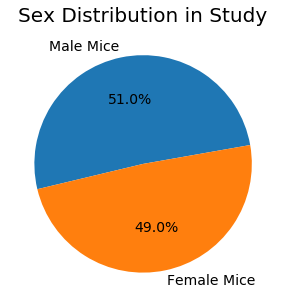

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count=clean_df["Sex"].value_counts() #finds the value counts for sexes

labels=["Male Mice", "Female Mice"] #sets the labels
plt.figure(figsize=(10,5)) #sets the figure size

#plots the graph
plt.pie(sex_count,labels=labels,autopct="%1.1f%%",startangle=10,textprops={'fontsize': 14})

#adds a graph title
plt.title("Sex Distribution in Study",fontsize=20)

#outputs the graph
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouseId_maxTime_gb=clean_df.groupby("Mouse ID").max()['Timepoint']
mouseId_maxTime_df=mouseId_maxTime_gb.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
greatest_TimeP_df=pd.merge(mouseId_maxTime_df,clean_df,how="left")
greatest_TimeP_df=greatest_TimeP_df.set_index("Mouse ID")#sets index to Mouse ID
greatest_TimeP_df.head()#merged graph

,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,45,Infubinol,Female,20,23,67.973419,2
a251,45,Infubinol,Female,21,25,65.525743,1
a262,45,Placebo,Female,17,29,70.717621,4
a275,45,Ceftamin,Female,20,28,62.999356,3
a366,30,Stelasyn,Female,16,29,63.440686,1


In [14]:
#creates a list that stores the name and 'tumor volume' values for each of the top four regiments
theDrugs=["Capomulin","Ramicane","Infubinol","Ceftamin"]
theDrugs_values=[]

#variables for outliers
found_outlier=False #boolean to check if found outliers
outlier_drug="" #string to output the outliers found

#populates the theDrugs_values list with the Tumor Volume results for top four regiments
for drug in theDrugs:
    theDrugs_values.append(greatest_TimeP_df.loc[(greatest_TimeP_df['Drug Regimen'])==drug]["Tumor Volume (mm3)"])


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in theDrugs: #finds the quartiles, boundaries, and IQR for each of the four regimens
    Quartile=greatest_TimeP_df.loc[(greatest_TimeP_df['Drug Regimen'])==drug]["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq=round(Quartile[.25],2)
    upperq=round(Quartile[.75],2)
    iqr=round(upperq-lowerq,2)
    upper_bounds=round(upperq+(1.5*iqr),2)
    lower_bounds=round(lowerq-(1.5*iqr),2)
    
    
    
    #checks to see if there are any potential outliers for each of the four drug regimens
    for i in theDrugs_values[theDrugs.index(drug)]:
        if (i > upper_bounds) | (i < lower_bounds):
            outlier_drug=outlier_drug+(f"[{round(i,2)}] ")
            found_outlier=True #found outlier
   
    if found_outlier==False: #if no outlier is found for the regimen mark it as none
        outlier_drug="None"
 
    
    #prints the results for each drug
    print("")
    print(f"{drug} Regimen")
    print('------------------------')
    print(f"Upper Quartile: {upperq}")
    print(f"Lower Quartile: {lowerq}")
    print(f"IQR: {iqr}")
    print(f"Upper Bounds: {upper_bounds}")
    print(f"Lower Bounds: {lower_bounds}")
    print(f"Potential Outliers: {outlier_drug}")
    print('------------------------')
    
    found_outlier=False #resets the boolean for the next drug
    outlier_drug="" #resets the outlier string for the next drug



Capomulin Regimen
------------------------
Upper Quartile: 40.16
Lower Quartile: 32.38
IQR: 7.78
Upper Bounds: 51.83
Lower Bounds: 20.71
Potential Outliers: None
------------------------

Ramicane Regimen
------------------------
Upper Quartile: 40.66
Lower Quartile: 31.56
IQR: 9.1
Upper Bounds: 54.31
Lower Bounds: 17.91
Potential Outliers: None
------------------------

Infubinol Regimen
------------------------
Upper Quartile: 65.53
Lower Quartile: 54.05
IQR: 11.48
Upper Bounds: 82.75
Lower Bounds: 36.83
Potential Outliers: [36.32] 
------------------------

Ceftamin Regimen
------------------------
Upper Quartile: 64.3
Lower Quartile: 48.72
IQR: 15.58
Upper Bounds: 87.67
Lower Bounds: 25.35
Potential Outliers: None
------------------------


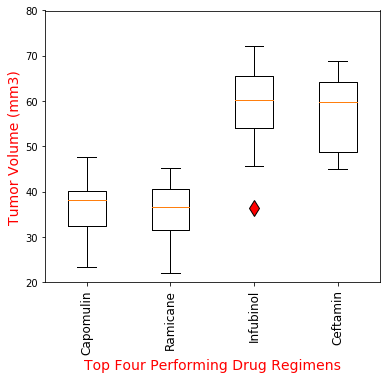

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.figure(figsize=(6,5)) #sets the figure size
red_square = dict(markerfacecolor='r', marker='d',markersize=12)
#labels graph
plt.xlabel("Top Four Performing Drug Regimens",fontsize=14,color="red")
plt.ylabel("Tumor Volume (mm3)",fontsize=14,color="red")

#plots graph
plt.boxplot(theDrugs_values, flierprops=red_square)

#sets the x ticks
x_locations=np.arange(1,5,1)
plt.xticks(x_locations,theDrugs,fontsize=12,rotation=90)

plt.ylim(20,80)#changes the y limit

plt.show()


## Line and Scatter Plots

In [23]:
#selects a random mouse treated with Capomulin for the following sections
capomulin_mice_df=clean_df.loc[(clean_df["Drug Regimen"]=="Capomulin")]
capomulin_mouse_id=random.choice(capomulin_mice_df["Mouse ID"].unique())
print (f"Mouse ID: {capomulin_mouse_id}")

Mouse ID: j246


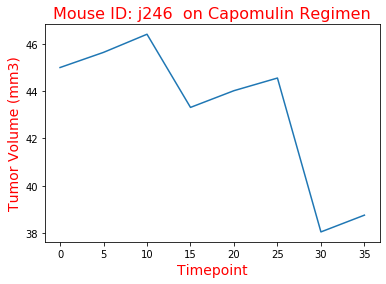

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#finds the data for the Mouse ID selected above
capomulin_mouse=capomulin_mice_df.loc[(capomulin_mice_df["Mouse ID"]==capomulin_mouse_id)]

#sets the x-axis and y-axis
cap_y_axis=capomulin_mouse["Tumor Volume (mm3)"]
cap_x_axis=np.arange(0,len(capomulin_mouse["Timepoint"]),1)

#plots the graph
plt.plot(cap_x_axis,cap_y_axis)

#labels graph
plt.title((f"Mouse ID: {capomulin_mouse_id}  on Capomulin Regimen"),fontsize=16,color="red")
plt.xlabel("Timepoint",fontsize=14,color="red")
plt.ylabel("Tumor Volume (mm3)",fontsize=14,color="red")
plt.xticks(cap_x_axis,capomulin_mouse["Timepoint"])

print()
plt.show()

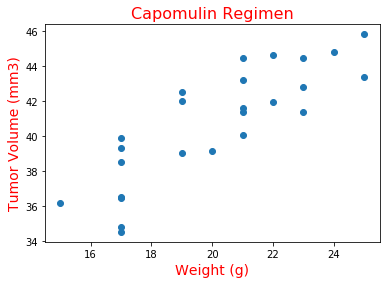

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_mouse_id_gb=capomulin_mice_df.groupby("Mouse ID").mean()
scatter_y_axis=cap_mouse_id_gb["Tumor Volume (mm3)"]
scatter_x_axis=cap_mouse_id_gb["Weight (g)"]
scatter_xticks=np.arange(0,len(cap_mouse_id_gb["Weight (g)"]),1)

#labels graph
plt.title(("Capomulin Regimen"),fontsize=16,color="red")
plt.xlabel("Weight (g)",fontsize=14,color="red")
plt.ylabel("Tumor Volume (mm3)",fontsize=14,color="red")

#plots the graph
plt.scatter(scatter_x_axis,scatter_y_axis)
plt.show()


## Correlation and Regression


The correlation between both factors is 0.84


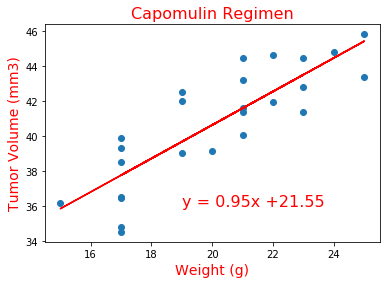

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#finds the correlation
correlation= st.pearsonr(scatter_x_axis,scatter_y_axis)

#plots the graph
plt.title(("Capomulin Regimen"),fontsize=16,color="red")
plt.xlabel("Weight (g)",fontsize=14,color="red")
plt.ylabel("Tumor Volume (mm3)",fontsize=14,color="red")
plt.scatter(scatter_x_axis,scatter_y_axis)

#finds the linear regression values
(slope,intercept,v3, v4, v5)= st.linregress(scatter_x_axis,scatter_y_axis)
regress_values=scatter_x_axis*slope+intercept

#plots the linear regression model
plt.plot(scatter_x_axis,regress_values,"r-")

#annotates the graph with linear regression
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq, (19,36), fontsize=16, color="red")

#outputs the data
print()
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()